Here we want to estimate the fraction of events that are detected either by two or three detectors, considering design sensitivities and HLV network.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from Network_SNR import Network_SNR
from Network_SNR import HLV_zerodethighP

In [2]:
# construct popoulation of binaries
Nbinaries = 3000
dLmax = 400. #Mpc

Mc = np.ones(Nbinaries)*1.2 #BNS

# dL: uniform in Euclidean space
dL0 = np.linspace(0.,dLmax,1000)
pdL = dL0**2
cdL = cumtrapz(pdL,dL0,initial=0.)
cdL/=cdL[-1]
dL = np.interp(np.random.uniform(0.,1.,Nbinaries),cdL,dL0)

# zero redshift
z = np.zeros(Nbinaries)

# isotropic inclinations
iota0 = np.linspace(0.,np.pi/2.,1000)
piota = np.sin(iota0)
ciota = cumtrapz(piota,iota0,initial=0.)
ciota/=ciota[-1]
iota = np.interp(np.random.uniform(0.,1.,Nbinaries),ciota,iota0)

# uniformly distributed polarization angles
psi0 = np.linspace(0.,np.pi,1000)
ppsi = np.ones(len(psi0))
cpsi = cumtrapz(ppsi,psi0,initial=0.)
cpsi/=cpsi[-1]
psi = np.interp(np.random.uniform(0.,1.,Nbinaries),cpsi,psi0)

# isotropic sky positions
th0 = np.linspace(0.,np.pi,1000)
pth = np.sin(th0)
cth = cumtrapz(pth,th0,initial=0.)
cth/=cth[-1]
th = np.interp(np.random.uniform(0.,1.,Nbinaries),cth,th0)

phi0 = np.linspace(0.,2*np.pi,1000)
pphi = np.ones(len(phi0))
cphi = cumtrapz(pphi,phi0,initial=0.)
cphi/=cphi[-1]
phi = np.interp(np.random.uniform(0.,1.,Nbinaries),cphi,phi0)

RAdeg = phi/np.pi*180
DECdeg = (np.pi/2-th)/np.pi*180

In [3]:
# compute SNRs in three-detector network (all three detectors are assumed to have the zerodethighP 
# PSD (the model design sensitivity for LIGO), thus they have each a 200 Mpc range. We will rescale 
# the Virgo SNR afterwards. It would be more accurate if we gave Virgo its own anticipated design
# sensitivity curve.)

SNRs = np.empty([Nbinaries,3]) # shape: (Nbinaries,Ndetectors)

# compute the network SNR for each binary (all happen at gmst=0. - this shouldn't change anything, since the
# population is isotropic)
for i in range(Nbinaries):
    SNRs[i] = Network_SNR(HLV_zerodethighP, Mc[i], dL[i], z[i], iota[i], psi[i], RAdeg[i], DECdeg[i], 0.)[1]

In [4]:
# define the Virgo range
Virgo_range = 120. # Mpc

# rescale the Virgo SNR to account for its lower range
SNRs[:,2]*=Virgo_range/200.

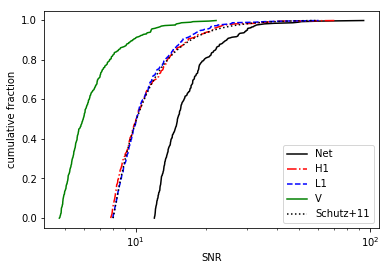

In [15]:
# compute the network SNR as (SNR_H^2 + SNR_L^2 + SNR_V^2)^(1/2)
SNR_net = np.sort((SNRs[:,0]**2 + SNRs[:,1]**2 + SNRs[:,2]**2)**0.5)

# plot the distributions of SNRs for detected binaries

## a network detection is assumed to correspond to SNR_net>12
det_network=(SNR_net>12.)
SNR_H = np.sort(SNRs[:,0])
SNR_L = np.sort(SNRs[:,1])
SNR_V = np.sort(SNRs[:,2])

# Schutz 2011 universal SNR distribution for detected inspirals, assuming SNR_limit = 8
SNRs2011 = np.linspace(8.,60.,100)
cs2011 = 1.-(SNRs2011/8.)**-3
cs2011[cs2011<0.]=0.
c = np.arange(len(SNR_net[det_network]))/len(SNR_net[det_network])

plt.plot(SNR_net[det_network],c,'-k',label='Net')
plt.plot(SNR_H[det_network],c,'-.r',label='H1')
plt.plot(SNR_L[det_network],c,'--b',label='L1')
plt.plot(SNR_V[det_network],c,'-g',label='V')
plt.plot(SNRs2011,cs2011,':k',label='Schutz+11')
plt.xscale('log')
plt.xlabel('SNR')
plt.ylabel('cumulative fraction')
plt.legend()


In [18]:
# print the fraction of detected inspirals within the simulated volume
c = np.arange(len(SNR_net))/len(SNR_net)
print("Network: {0:.3g}".format(1.-np.interp(12.,SNR_net,c)))
print("H1: {0:.3g}".format(1.-np.interp(8.,SNR_H,c)))
print("L1: {0:.3g}".format(1.-np.interp(8.,SNR_L,c)))
print("V: {0:.3g}".format(1.-np.interp(8.,SNR_V,c)))

Network: 0.119
H1: 0.111
L1: 0.118
V: 0.0209


In [100]:
# count 3-det and 2-det detections

det_single = (SNRs>4.)
det_network = (SNR_net>12.)

Ndet = np.sum(det_single,axis=1)

N3det = len(Ndet[(Ndet==3.) & det_network])
N2det = len(Ndet[(Ndet==2.) & det_network])

print(N3det/Nbinaries,N2det/Nbinaries)

0.159 0.084
